In [ ]:
!pip install opencv-python

In [1]:
import cv2

In [2]:
img=cv2.imread("/content/drive/MyDrive/Jahnavi Jaddi/Week 1/Image processing cv2/mandrill.jpg",1)

In [6]:
print(img.shape)
h,w,c=img.shape
print("Dimensions of the image is Height:{0} Width:{1} Channels:{2} ".format(h,w,c))

(224, 225, 3)
Dimensions of the image is Height:224 Width:225 Channels:3 


In [7]:
print(img.dtype)

uint8


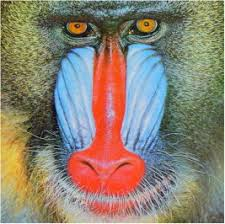

In [11]:
# Viewing image
from google.colab.patches import cv2_imshow
cv2_imshow(img)
k=cv2.waitKey(0)
if k==27 or k== ord('q'):
  cv2.destroyAllWindows()

In [18]:
# Saving image
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imwrite('Mandrill_grey.jpg',gray)

True

In [15]:
# Extracting image bit planes and reconstructing

import matplotlib.pyplot as plt
import numpy as np

def extract_bit_plane(cd):
  #extracting all bit
  c1=np.mod(cd,2)
  c2=np.mod(np.floor(cd/2),2)
  c3=np.mod(np.floor(cd/4),2)
  c4=np.mod(np.floor(cd/8),2)
  c5=np.mod(np.floor(cd/16),2)
  c6=np.mod(np.floor(cd/32),2)
  c7=np.mod(np.floor(cd/64),2)
  c8=np.mod(np.floor(cd/128),2)

  # combining image layers
  cc=2*(2*(2*c8+c7)+c6) # reconstructing most significant 3 layers
  to_plot = [cd,c1,c2,c3,c4,c5,c6,c7,c8,cc]
  fig,axes=plt.subplots(nrows=2,ncols=5,figsize=(10,8),subplot_kw={'xticks':[],'yticks':[]})
  fig.subplots_adjust(hspace=0.05,wspace=0.05)
  for ax,i in zip(axes.flat,to_plot):
    ax.imshow(i,cmap='gray')
  plt.tight_layout()
  plt.show()
  return cc


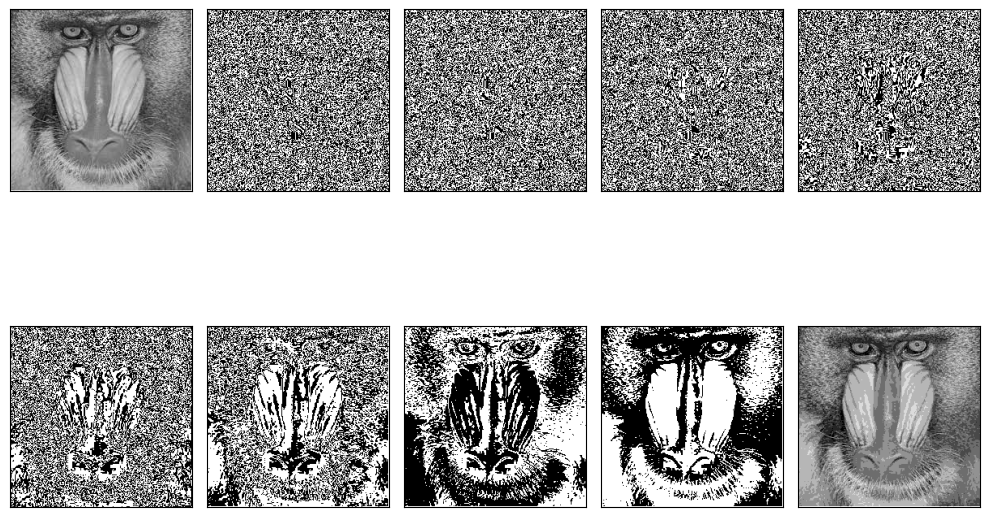

In [19]:
reconstructed_image=extract_bit_plane(gray)

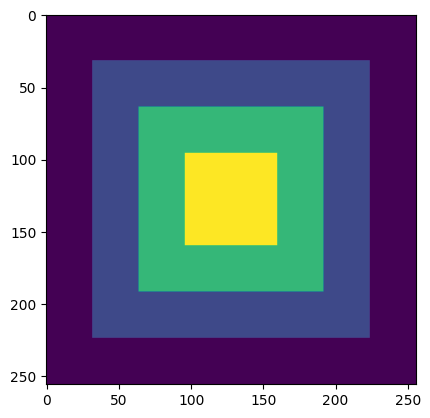

In [20]:
# constructing small synthetic image
con_img = np.zeros([256, 256])
con_img[0:32, :] = 40 # upper row
con_img[:, :32] = 40 #left column
con_img[:, 224:256] = 40 # right column
con_img[224:, :] = 40 # lower row
con_img[32:64, 32:224] = 80 # upper row
con_img[64:224, 32:64] = 80 # left column
con_img[64:224, 192:224] = 80 # right column
con_img[192:224, 32:224] = 80 # lower row
con_img[64:96, 64:192] = 160 # upper row
con_img[96:192, 64:96] = 160 # left column
con_img[96:192, 160:192] = 160 # right column
con_img[160:192, 64:192] = 160 # lower row
con_img[96:160, 96:160] = 220
plt.imshow(con_img)

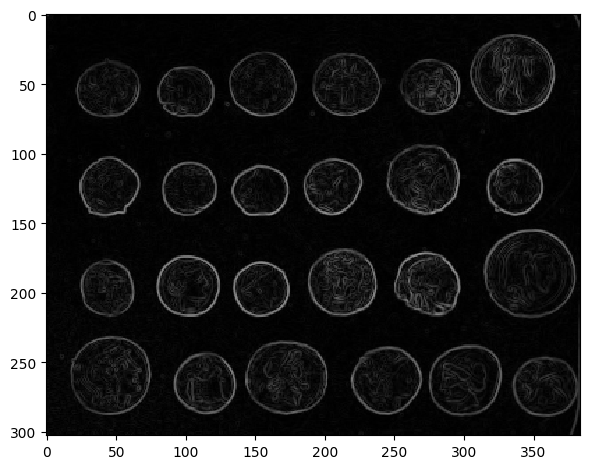

In [21]:
# skimage

import skimage as ski

image = ski.data.coins()
edges = ski.filters.sobel(image)
ski.io.imshow(edges)
ski.io.show()


In [ ]:
# Canny edge detection

"""
The process of Canny edge detection algorithm can be broken down to five different steps:

1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image
3. Apply gradient magnitude thresholding or lower bound cut-off suppression to get rid of spurious response to edge detection
4. Apply double threshold to determine potential edges
5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.
"""

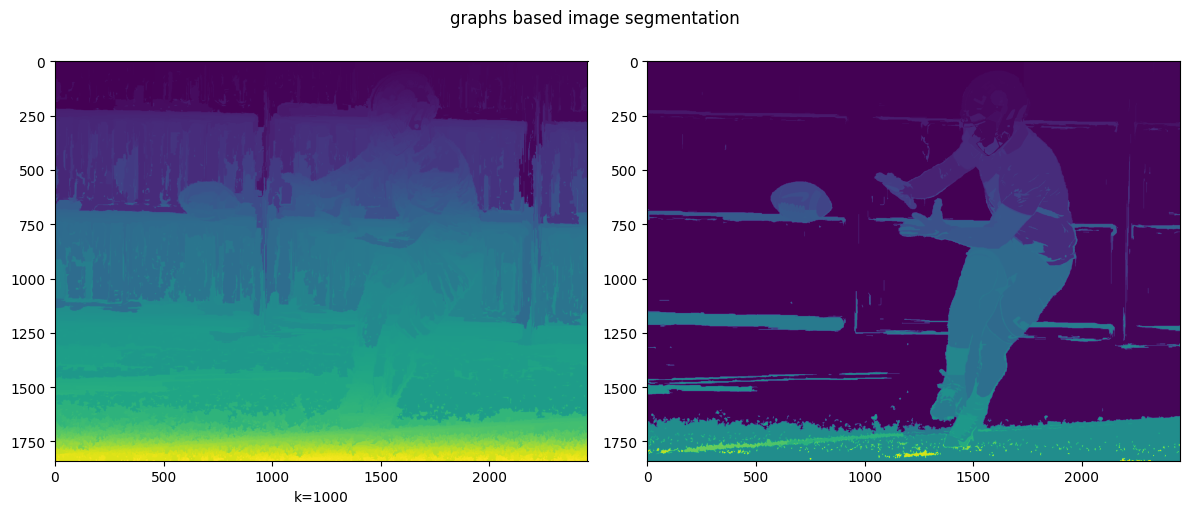

In [3]:
# Felzenszwalb's Algorithm

import skimage.segmentation
from matplotlib import pyplot as plt

img=plt.imread("/content/drive/MyDrive/Jahnavi Jaddi/Week 1/Image processing cv2/65534image1.jpg")

# performing segmentation
# first for k=50
# second for k=1000

res1=skimage.segmentation.felzenszwalb(img,scale=50)
res2=skimage.segmentation.felzenszwalb(img,scale=1000)

# results
fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.imshow(res1); ax1.set_xlabel("k=50")
ax2.imshow(res2); ax1.set_xlabel("k=1000")
fig.suptitle("graphs based image segmentation")
plt.tight_layout()


Text(0.5, 0.98, 'plotting the boundaries')

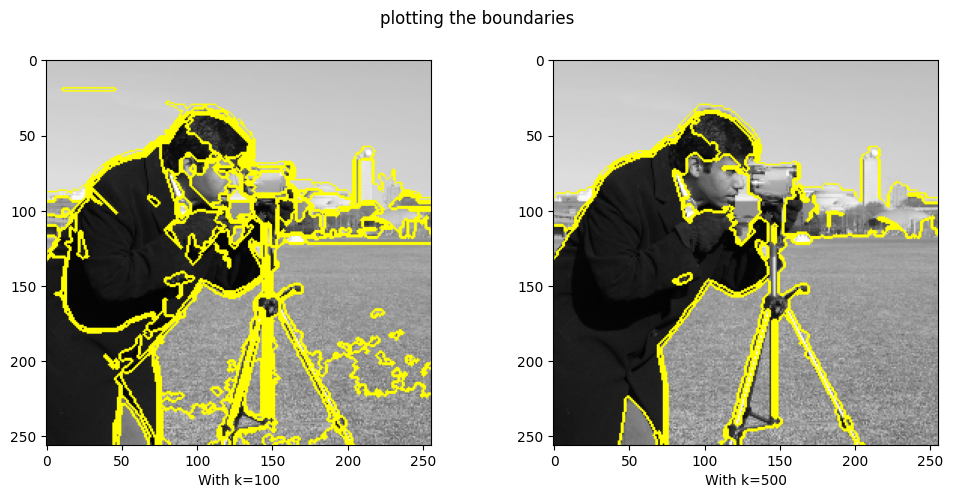

In [4]:
# marking boundaries for the image

from skimage.data import camera
from skimage.util import img_as_float

# import function for marking boundaries
from skimage.segmentation import mark_boundaries

img=img_as_float(camera()[::2,::2])

res3= skimage.segmentation.felzenszwalb(img, scale=100)
res4= skimage.segmentation.felzenszwalb(img, scale=500)

fig = plt.figure(figsize=(12,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.imshow(mark_boundaries(img,res3)); ax1.set_xlabel("With k=100")
ax2.imshow(mark_boundaries(img,res4)); ax2.set_xlabel("With k=500")
fig.suptitle("plotting the boundaries")



In [6]:
# mAP mean average Precision for calculating the performance of
# object detection considering the location and detection of the object

# installing required softwares:
!pip install pycocotools # ==2.0.4 -- this version fails with following error note: This error originates from a subprocess, and is likely not a problem with pip.
  # Building wheel for pycocotools (pyproject.toml) ... error
  # ERROR: Failed building wheel for pycocotools
!pip install progressbar # ==3.38.0 ERROR: Could not find a version that satisfies the requirement progressbar==3.38.0 (from versions: 2.1, 2.2, 2.3, 2.5)
# ERROR: No matching distribution found for progressbar==3.38.0



  Preparing metadata (setup.py) ... done
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=7ae7a4d9cec360729b4ab0dcb2c5e7827859b208a25a52571c350785b4c23938
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built progressbar


In [7]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15825, done.
remote: Counting objects: 100% (286/286), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 15825 (delta 151), reused 219 (delta 140), pack-reused 15539
Receiving objects: 100% (15825/15825), 14.76 MiB | 17.37 MiB/s, done.
Resolving deltas: 100% (10581/10581), done.


In [8]:
import sklearn.metrics

ground_truth = ["cat", "cat", "others", "cat", "others", "others","cat", "cat", "cat", "others" ]
prediction = ["cat", "others", "cat", "cat", "others", "others","cat", "others", "others", "cat"]

precision = sklearn.metrics.precision_score(ground_truth, prediction, pos_label="cat")
print(precision)

0.6


In [9]:
import sklearn.metrics
ground_truth = ["cat", "cat", "others", "cat", "others", "others","cat", "cat", "cat", "others"]
prediction = ["cat", "others", "cat", "cat", "others", "others", "cat", "others", "others", "cat"]
recall = sklearn.metrics.recall_score(ground_truth, prediction, pos_label="cat")
print(recall)

0.5


In [ ]:
f1_score = np.divide(2 * (np.array(precisions) * np.array(recalls)), (np.array(precisions) + np.array(recalls)))
print(f1_score)
array([0.71959027, 0.69536849, 0.69536849, 0.69986987, 0.73694181, 0.70606916, 0.70606916, 0.66687977, 0.57106109, 0.46121884])